<h2 style="font-weight:700">현대해상 가격지수 크롤링</h2>

다음과 같은 가입설계 화면에서 Ctrl+S를 누르면 HTML을 다운 받을 수 있음

다운 받은 파일 중 <span style="font-weight:700"> websquare(4).html </span> 파일을 사용하면 가격지수 크롤링이 가능함

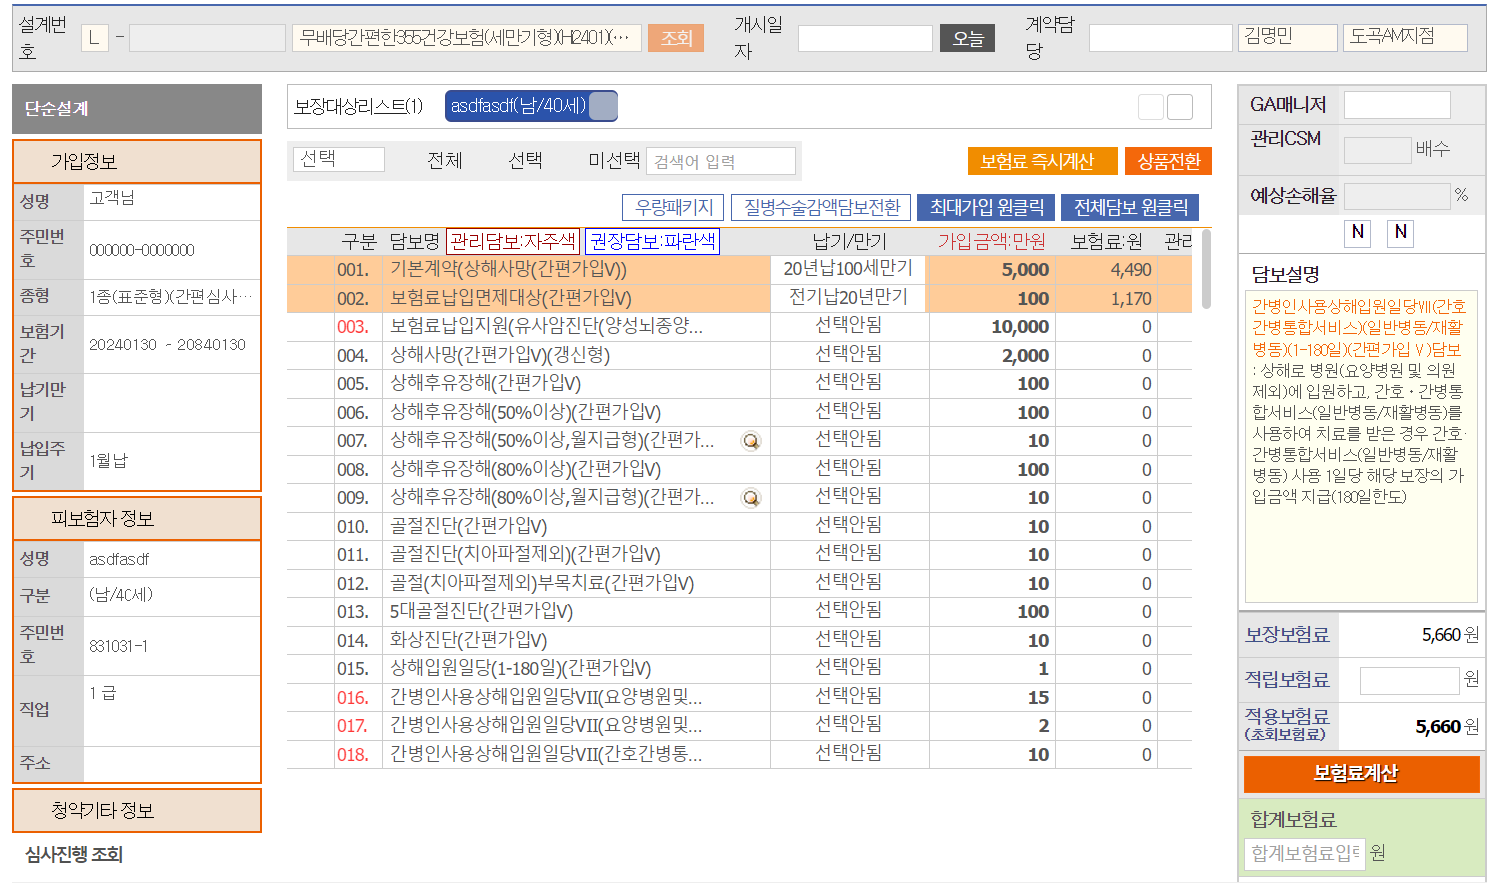

<h4 style="font-weight:700">Crawling Demo</h4>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import os
from bs4 import BeautifulSoup as bs

In [3]:
df = pd.DataFrame()
INPUT_DIR = './input'

for html in os.listdir(INPUT_DIR):
    html_path = os.path.join(INPUT_DIR, html)
    with open(html_path , 'r', encoding='utf-8') as f:

        html_string = f.read()
        soup = bs(html_string, 'lxml')

        product_name = soup.find(id='opt_prodNm').text
        jong_hyung = soup.find(id='opt_displayprodPlanListValNm').text
        payment_term = soup.find(id='sum_com_paydMthdList_2').text
        sex_age = soup.find(id='wq_uuid_218').text
        injure = soup.find(id='wq_uuid_241').text
        table = soup.find(id="dgr_plnElagGrid_body_tbody")

        for tr in table.find_all('tr', class_ = 'grid_body_row'):
            td_lst = tr.find_all('td')
            covrage_name = td_lst[2].text
            n_m = td_lst[4].text
            amt = td_lst[5].text
            premium = td_lst[6].text    

            info = pd.DataFrame([{
                "상품명":product_name,
                "종형":jong_hyung,
                "납입주기":payment_term,
                "피보험자구분":sex_age,
                "직업급수":injure,
                "담보명":covrage_name,
                "납만기":n_m,
                "가입금액":amt,
                "보험료":premium
            }])

            df = pd.concat([df, info], ignore_index=True)

In [4]:
df.to_csv('./result.csv', sep='\t', index=False)
df.head()

,상품명,종형,납입주기,피보험자구분,직업급수,담보명,납만기,가입금액,보험료
0,무배당간편한355건강보험(세만기형)(Hi2401)(간편심사Ⅴ),1종(표준형)(간편심사Ⅴ)1형(납입면제형),1월납,(남/40세),1급,기본계약(상해사망(간편가입Ⅴ)),20년납100세만기,"50,000","5,000"
1,무배당간편한355건강보험(세만기형)(Hi2401)(간편심사Ⅴ),1종(표준형)(간편심사Ⅴ)1형(납입면제형),1월납,(남/40세),1급,보험료납입면제대상(간편가입Ⅴ),전기납20년만기,"1,000",100
2,무배당간편한355건강보험(세만기형)(Hi2401)(간편심사Ⅴ),1종(표준형)(간편심사Ⅴ)1형(납입면제형),1월납,(남/40세),1급,보험료납입지원(유사암진단(양성뇌종양포함))(간편가입Ⅴ),선택안됨,"10,000","10,000"
3,무배당간편한355건강보험(세만기형)(Hi2401)(간편심사Ⅴ),1종(표준형)(간편심사Ⅴ)1형(납입면제형),1월납,(남/40세),1급,상해사망(간편가입Ⅴ)(갱신형),선택안됨,"20,000","2,000"
4,무배당간편한355건강보험(세만기형)(Hi2401)(간편심사Ⅴ),1종(표준형)(간편심사Ⅴ)1형(납입면제형),1월납,(남/40세),1급,상해후유장해(간편가입Ⅴ),선택안됨,"1,000",100
